# Batter Data

In [3]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports - sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
# read in batter training data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in batter testing data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [5]:
# set up X and y from training data
X = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y = batter_train['FPPG']

In [6]:
# create pipeline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('linreg', LinearRegression())
])

In [7]:
#create params for pipeline
params = {'sc__with_mean': [True, False],
          'sc__with_std' : [True, False],
          'linreg__fit_intercept' : [True, False],
          'linreg__normalize'   : [True, False],
          'linreg__copy_X'    : [True, False],
          'linreg__n_jobs'     : np.linspace(0, 1, 5),
          'linreg__positive': [True, False]
}

In [8]:
# create grid search cv
grid = GridSearchCV(pipe, params, cv=5)

In [9]:
# fit with training data
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('linreg', LinearRegression())]),
             param_grid={'linreg__copy_X': [True, False],
                         'linreg__fit_intercept': [True, False],
                         'linreg__n_jobs': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'linreg__normalize': [True, False],
                         'linreg__positive': [True, False],
                         'sc__with_mean': [True, False],
                         'sc__with_std': [True, False]})

In [10]:
grid.best_params_

{'linreg__copy_X': True,
 'linreg__fit_intercept': False,
 'linreg__n_jobs': 0.0,
 'linreg__normalize': True,
 'linreg__positive': True,
 'sc__with_mean': False,
 'sc__with_std': False}

In [11]:
grid.best_score_

0.5516178839162919

In [12]:
# generate predictions on testing data with grid
# step 1, create testing df
test_df = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
# step 2, generate predictions using testing df save to original testing data
batter_test['Projected_FPPG'] = grid.predict(test_df)

In [13]:
# score with RMSE
mean_squared_error(y_true=batter_test['FPPG'], y_pred=batter_test['Projected_FPPG'], squared=False)

2.6051875444857826

In [14]:
grid.score(X, y)

0.8872081475353188

In [15]:
grid.score(test_df, batter_test['FPPG'])

0.47495562984075346

In [ ]:
grid.predict()

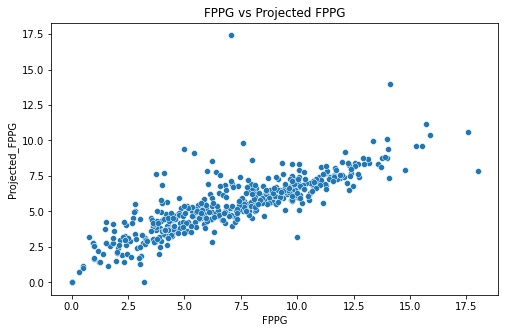

In [16]:
# graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=batter_test, x='FPPG', y='Projected_FPPG')
plt.title('FPPG vs Projected FPPG');

# Note: 
The grid searched linear regression model actually performed worse than the default model.  With an inability to pull coefficient values out of the grid search model and higher RMSE score this model will not be used.

---

# Pitcher Data

In [17]:
# additional imports
from sklearn.ensemble import RandomForestRegressor

In [18]:
# import pitcher training data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# import batter testing data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [19]:
# set x and y
X = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y= pitcher_train['FPPG']

In [20]:
# create pipeline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('forest', RandomForestRegressor())
])

In [21]:
# create params
params = {
    'sc__with_mean': [True, False],
    'sc__with_std' : [True, False],
    'forest__max_depth': [2, 3, 5, 7],
    'forest__min_samples_split': [5, 10, 15, 20],
    'forest__min_samples_leaf': [2, 3, 4, 5, 6],
}

In [22]:
# create grid
grid2 = GridSearchCV(pipe, params, cv=5)

In [23]:
grid2.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('forest', RandomForestRegressor())]),
             param_grid={'forest__max_depth': [2, 3, 5, 7],
                         'forest__min_samples_leaf': [2, 3, 4, 5, 6],
                         'forest__min_samples_split': [5, 10, 15, 20],
                         'sc__with_mean': [True, False],
                         'sc__with_std': [True, False]})

In [24]:
grid2.best_score_

0.26643266971179624

In [25]:
grid2.best_params_

{'forest__max_depth': 7,
 'forest__min_samples_leaf': 3,
 'forest__min_samples_split': 5,
 'sc__with_mean': True,
 'sc__with_std': True}

In [26]:
# generate predictions on testing data with grid
# step 1, create testing df
test_df2 = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
# step 2, generate predictions using testing df save to original testing data
pitcher_test['Projected_FPPG'] = grid2.predict(test_df2)

In [27]:
# score with RMSE
mean_squared_error(y_true=pitcher_test['FPPG'], y_pred=pitcher_test['Projected_FPPG'], squared=False)

7.353663820260158

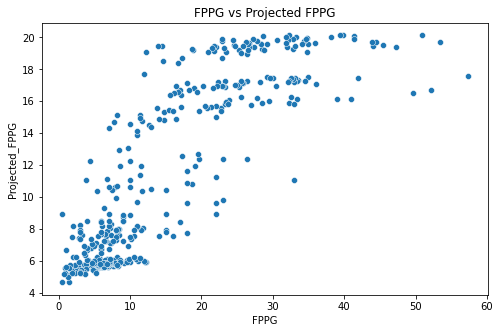

In [28]:
# graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=pitcher_test, x='FPPG', y='Projected_FPPG')
plt.title('FPPG vs Projected FPPG');

# Note: 
The random forest, similar to the batter data did not perform better than the default model.  The next step is to use the default models with scaled data.  The scaling process is important in the context of our model as the coefficient values help to identify important features.